# First Neurons

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [2]:
np.random.seed(101)
tf.random.set_seed(101)

** Data Setup **

Setting Up some Random Data for Demonstration Purposes

In [3]:
rand_a = np.random.uniform(0, 100, (5, 5))
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [4]:
rand_b = np.random.uniform(0, 100, (5, 1))
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [5]:
add_result = rand_a + rand_b 
mult_result = rand_a * rand_b

In [6]:
print(add_result)
print('\n')
print(mult_result)

[[151.07165289 156.4985488  102.27921276 116.58395574 167.95948829]
 [135.45622593  82.76316164 141.42784764 124.22092585  71.06043509]
 [113.30171266  93.09214895  76.06819381 136.43912973 154.42727579]
 [ 96.71727201  81.83804919 133.83674806 146.38118156 101.10578868]
 [122.7268101  105.98292464  59.04463097  67.98310098  72.89291984]]


[[5134.64399656 5674.24997231  283.12433109 1705.4705322  6813.8317015 ]
 [4341.81240779 1598.26688535 4652.73408616 3756.82921013  988.94640937]
 [3207.81130015 2038.10290097 1052.77419242 4546.98078818 5588.11585809]
 [1707.3789896   614.02533992 4434.98883288 5356.77771395 2029.85555814]
 [3714.09832466 2806.64374096  262.76765829  747.19856325 1013.29197619]]


## Example Neural Network

In [7]:
n_features = 10
n_dense_neurons = 3

In [8]:
# Variables for w and b
b = tf.Variable(tf.zeros([n_dense_neurons]), name="b")
W = tf.Variable(tf.random.normal([n_features, n_dense_neurons]), name="W")

In [9]:
@tf.function
def forward(x):
    xW = tf.matmul(x,W)
    z = tf.add(xW,b)
    a = tf.sigmoid(z)
    
    return a

In [10]:
layer_out = forward(np.random.random([1,n_features]).astype(np.float32))

In [11]:
print(layer_out)

tf.Tensor([[0.9523111  0.04376048 0.8293556 ]], shape=(1, 3), dtype=float32)


We still need to finish off this process with optimization! Let's learn how to do this next.

_____

## Full Network Example

Let's work on a regression example, we are trying to solve a very simple equation:

y = mx + b

y will be the y_labels and x is the x_data. We are trying to figure out the slope and the intercept for the line that best fits our data!

### Artifical Data (Some Made Up Regression Data)

In [12]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [13]:
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [14]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

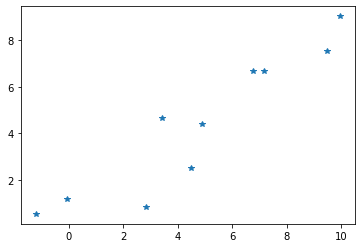

In [15]:
plt.plot(x_data,y_label,'*')

In [16]:
np.random.rand(2)

array([0.44236813, 0.87758732])

In [17]:
m = tf.Variable(0.39)
b = tf.Variable(0.2)

### Cost Function

In [18]:
def loss():
    loss = 0
    
    for x,y in zip(x_data,y_label):
        y_hat = m*x + b  #Our predicted value
        loss += (y-y_hat)**2 # The cost we want to minimize (we'll need to use an optimization function for the minimization!)
        
    return loss

### Optimizer

In [19]:
optimizer = tf.optimizers.SGD(learning_rate=0.001)

In [30]:
@tf.function
def do_train():
    epochs = 100
    
    for i in range(epochs):
        optimizer.minimize(loss, var_list=[m, b])
        
    # Fetch Back Results
    return m, b

In [31]:
final_slope , final_intercept = do_train()

In [32]:
final_slope

<tf.Tensor: shape=(), dtype=float32, numpy=0.78071856>

In [33]:
final_intercept

<tf.Tensor: shape=(), dtype=float32, numpy=0.6386387>

### Evaluate Results

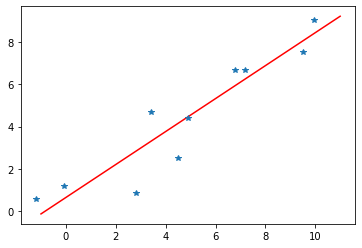

In [34]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')

plt.plot(x_data,y_label,'*')